---
---
<u>Dataset 3: NLP<u>
--
For this part of the coursework, I'll be working with a dataset that contains text from news articles. The data is stored in a CSV file, but since the articles include commas, I'll need to use a tab as the delimiter when loading the file. The file has a single feature: the news stories, with each one on its own line.

---

<u>Question<u>
--

You will need to perform the following steps on the dataset:

1. EDA
2. Build a pipline which can transform the text into a format which can be handled by a machine learning model
3. Work out how many types of news articles are present in the dataset
4. Present the results for your work in the most appropriate means.
5. Provide a short report on which approaches you used and which gave the best results.

---

<u>Implementation<u>
--

Load the dataset using a tab as the separator and display its basic structure and summary information with `info()`.

In [1]:
import pandas as pd
file_path = 'dataset3_news.csv'
news_data = pd.read_csv(file_path, sep='\t')
news_data_info = news_data.info()
news_data_info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   story   2225 non-null   object
dtypes: object(1)
memory usage: 17.5+ KB


The dataset consists of 2,225 rows and 1 column, `story`, which contains non-null text entries of type object.

---

Display the first few rows of the dataset using head() to get an initial overview of the data.

In [2]:
news_data_head = news_data.head()
news_data_head

,story
0,Quarterly profits at US media giant TimeWarner...
1,The dollar has hit its highest level against t...
2,The owners of embattled Russian oil giant Yuko...
3,British Airways has blamed high fuel prices fo...
4,Shares in UK drinks and food firm Allied Domec...


---

 <u>Exploratory data analysis (EDA)<u>
 ---
 

We run `!pip install wordcloud` to install the WordCloud library, which is used to generate word clouds from text data.

!pip install wordcloud

<u>Import Libraries<u>
-

Importing all the necessary libraries to read process data and apply our model.

In [3]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


The below code implements a custom tokenizer to clean the news articles, removes common stop words, calculates word counts

In [4]:
def custom_tokenizer(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens
stop_words = set(["the", "is", "and", "in", "to", "of", "a", "that", "it", "on", "for", "this", "with", "as", "was", "at", "by"])
news_data['cleaned_words'] = news_data['story'].apply(custom_tokenizer)
news_data['filtered_words'] = news_data['cleaned_words'].apply(lambda x: [word for word in x if word not in stop_words])
news_data['word_count'] = news_data['filtered_words'].apply(len)
average_words = news_data['word_count'].mean()
word_count_distribution = news_data['word_count'].describe()
all_filtered_words = [word for words in news_data['filtered_words'] for word in words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_filtered_words))
average_words, word_count_distribution

(np.float64(289.2638202247191),
 count    2225.000000
 mean      289.263820
 std       179.705582
 min        68.000000
 25%       184.000000
 50%       250.000000
 75%       354.000000
 max      3304.000000
 Name: word_count, dtype: float64)

From the data analysis, we found that the **average news article has about 289 words**. The length of the articles varies a lot, with the **shortest article having 68 words** and the **longest one having 3,304 words**. Half of the articles are shorter than 250 words, which is the median. The standard deviation of around 179.71 words shows that there is quite a bit of difference in the length of the articles, meaning some are much longer or shorter than others.

---

<u>Visualization: Word Count Distribution<u>
-

We plot a graph for the distribution of Word Counts in News Articles.

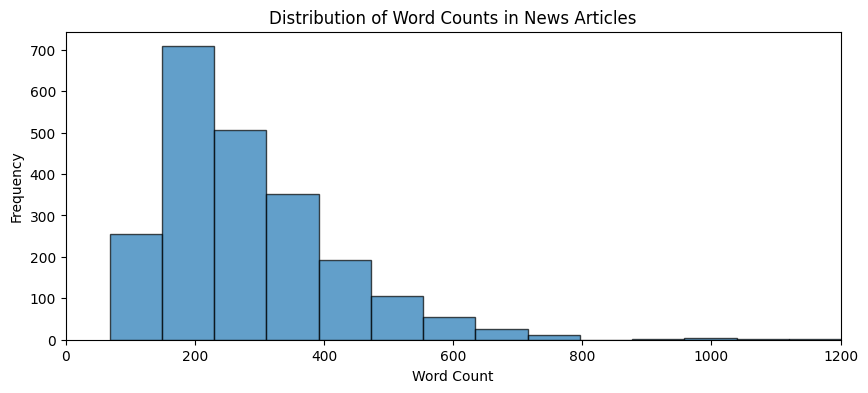

In [5]:
plt.figure(figsize=(10, 4))
plt.hist(news_data['word_count'], bins=40, edgecolor='k', alpha=0.7)
plt.title("Distribution of Word Counts in News Articles")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 1200)
plt.show()

Most of the articles are short, with the **majority having between 100 and 200 words**, while very few articles are longer than 1000 words. 

---

<u>Visualization: Word Cloud<u>
--

We plot a graph for the Word Cloud of Filtered Words in News Articles.

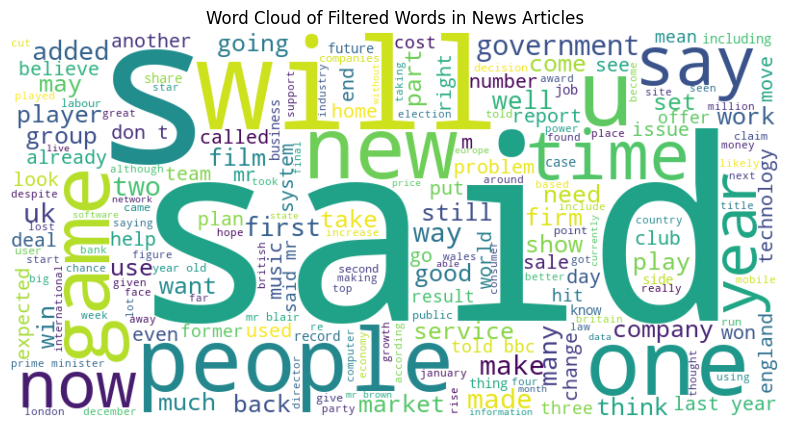

In [6]:
 plt.figure(figsize=(13, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Filtered Words in News Articles")
plt.show()

A word cloud illustrates the most frequent terms in the dataset after filtering stop words, giving insights into prominent topics or themes.
Highlighted frequent terms such as **"said," "will," and "year,"** giving insights into common themes.

---

<u>Text Preprocessing<u>
 --

The below code handles the text preprocessing, which includes tokenization, stopword removal, and applying these operations to a subset of the dataset.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def preprocess_text(text):
    tokens = custom_tokenizer(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)
news_data['processed_text'] = news_data['story'].apply(preprocess_text)
sample_size = 100
sample_texts = news_data['processed_text'].iloc[:sample_size]

---
<u>Text Transformation<u>
--

The vectorization process converts the text into numerical representations using **Bag of Words (BoW)**, which counts word frequencies, and **TF-IDF**, which weighs terms based on their importance across the entire dataset. This transformation helps capture the key features of the text, allowing for more effective analysis and machine learning modeling.

In [8]:
bow_vectorizer_sample = CountVectorizer()
bow_matrix_sample = bow_vectorizer_sample.fit_transform(sample_texts)
tfidf_vectorizer_sample = TfidfVectorizer()
tfidf_matrix_sample = tfidf_vectorizer_sample.fit_transform(sample_texts)
bow_features_sample = bow_vectorizer_sample.get_feature_names_out()[:10]
tfidf_features_sample = tfidf_vectorizer_sample.get_feature_names_out()[:10]
bow_sample_values = bow_matrix_sample.toarray()[:5]
tfidf_sample_values = tfidf_matrix_sample.toarray()[:5]
bow_features_sample, tfidf_features_sample, bow_sample_values, tfidf_sample_values

(array(['000', '03', '04', '04bn', '05bn', '0619', '06bn', '09', '09bn',
        '10'], dtype=object),
 array(['000', '03', '04', '04bn', '05bn', '0619', '06bn', '09', '09bn',
        '10'], dtype=object),
 array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 5, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0.02518407, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.27668185, 0.        ,
         0.        ],
        [0.024769  , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))



The text transformation process showed that terms like **"000," "03," and "said"** were common in the dataset. Both BoW and TF-IDF identified the same terms, but with different methods. BoW counts how often a word appears, while TF-IDF gives more weight to important words based on their frequency across the dataset, making TF-IDF more precise in highlighting key terms.

---

<u>Clustering and Topic Modeling of News Articles<u>
 --

The below code analyzes the dataset by grouping similar news articles into 5 clusters using **K-Means clustering** based on TF-IDF features. Articles in the same cluster have similar content. For topic modeling, **Latent Dirichlet Allocation (LDA)** identifies 5 distinct topics from Bag of Words (BoW) features. A custom function, `get_top_words`, extracts the top 10 words for each topic, helping to label and understand the themes. The clusters and topics are saved for further exploration.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix_sample)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(bow_matrix_sample)
def get_top_words(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics
lda_top_words = get_top_words(lda, bow_vectorizer_sample.get_feature_names_out(), 10)
unique_clusters = set(kmeans_labels)
lda_top_words, unique_clusters

({'Topic 1': ['said',
   'be',
   'will',
   'its',
   'boeing',
   'not',
   'planes',
   'from',
   'wine',
   '777'],
  'Topic 2': ['said',
   'are',
   'has',
   'its',
   'be',
   'have',
   'firm',
   'from',
   'which',
   'they'],
  'Topic 3': ['said',
   'its',
   'has',
   'year',
   'from',
   'economy',
   'growth',
   'have',
   'are',
   'but'],
  'Topic 4': ['said',
   'which',
   'year',
   'new',
   'are',
   'be',
   'from',
   'has',
   'have',
   'last'],
  'Topic 5': ['said',
   'us',
   'its',
   'has',
   'had',
   'from',
   'he',
   'yukos',
   'were',
   'sales']},
 {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)})

The results show 5 clusters, labeled from 0 to 4, that group articles with similar themes. Topic modeling revealed key focus areas: **aviation** (Topic 1), **corporate themes** (Topic 2), **economic trends** (Topic 3), **yearly patterns** (Topic 4), and **sales-related discussions** (Topic 5). These findings highlight the dataset's diverse content and provide insights into the thematic organization of the articles.

---

<u>Hyperparameter Tuning<u>
--

The below code evaluates the K-Means clustering model's performance by calculating the **Silhouette Score**, a metric that assesses how distinct and well-separated the clusters are. While the PCA (Principal Component Analysis) library is imported, it is not used in this block, possibly reserved for future visualization or dimensionality reduction. The Silhouette Score is computed using the TF-IDF feature matrix and cluster labels, offering insight into the clustering model's effectiveness.



In [10]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
silhouette_avg = silhouette_score(tfidf_matrix_sample, kmeans_labels) # Evaluate K-Means with silhouette score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.006692272032299836


The calculated Silhouette Score is approximately **0.0067**, indicating poor separation between clusters. This low value suggests considerable overlap among the clusters, likely caused by the high dimensionality of the text data or similar themes across articles.

---
<u>Visualization : K-Means clustering<u>
--

Use dimensionality reduction techniques to visualize the clustering results.
Display topic distributions per document for better interpretation of LDA results.

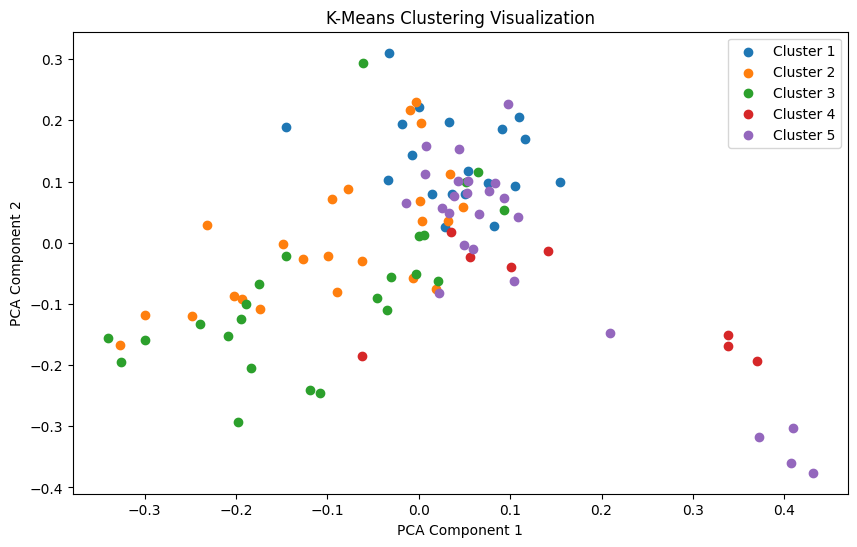

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2, random_state=42)
tfidf_pca = pca.fit_transform(tfidf_matrix_sample.toarray())
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_points = tfidf_pca[np.where(kmeans_labels == cluster)]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}")
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

The scatter plot visualizes K-Means clustering in two dimensions using PCA. While five clusters are shown, significant overlap indicates difficulty in separating similar articles. Some clusters, like Cluster 5, are more distinct, but others mix heavily, reflecting the low Silhouette Score. The plot highlights the challenges of clustering high-dimensional text data.

---
<u>Visualization : LDA topic distributions<u>
--

The below code visualizes the topic distribution for documents generated by the Latent Dirichlet Allocation (LDA) model. Each topic's proportion is plotted across documents to show the variation in contributions of different topics.

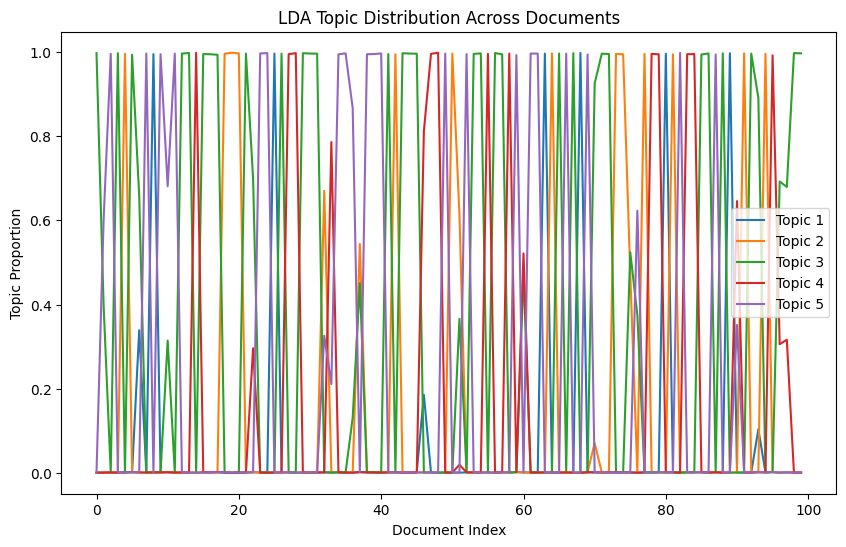

In [12]:
doc_topic_dist = lda.transform(bow_matrix_sample)
plt.figure(figsize=(10, 6))
for topic_idx in range(5):
    plt.plot(doc_topic_dist[:, topic_idx], label=f"Topic {topic_idx + 1}")
plt.title("LDA Topic Distribution Across Documents")
plt.xlabel("Document Index")
plt.ylabel("Topic Proportion")
plt.legend()
plt.show()

The graph shows how five topics are distributed across 100 documents, with each line representing a different topic. It highlights that some topics dominate specific documents, while others have little influence. This variation reflects the unique mix of topics in each document and their overall diversity.

---


<u>Conclusion<u>
--
This analysis shows how unsupervised learning can help understand unlabelled data. To improve clustering, it’s worth refining the features or trying methods like hierarchical clustering. For topic modeling, better results could come from fine-tuning settings and cleaning the data more carefully. These steps can pave the way for creating a supervised model to work with labeled data in the future.

---
---